# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [45]:
#Student Details
#Ofir T. 1514
#Eli O. 5355

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

<pre>   
AI agent name: OpenAI
    
Goal: start working in a jupyter notebook environment & syntax help
    
Prompt1:
    alright how do i use the jupyter notebook given to start working ?
    
Prompt2:
    Show me the syntax for a confusion matrix plot in sklearn.
    
Prompt3: 
    How do I perform 5-fold cross validation with GridSearchCV on a classification model?

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

<pre>
The dataset used is the Wine Recognition dataset.  
It contains the results of chemical analysis of wines from the same region in Italy, grown by three different cultivators.  

- Number of samples: 178(Train+Test)  
- Number of features: 13 continuous numeric chemical features (e.g., Alcohol, Proline, Color intensity)  
- Target variable: `class` (3 wine cultivars: 0, 1, 2)  
- Class distribution: class_0 (59), class_1 (71), class_2 (48)  
- Task type: Multi-class classification  
- Evaluation metric: Macro F1-score (to balance performance across all 3 classes).  

The goal of this assignment is to build a supervised machine learning pipeline to classify wines into their correct cultivar, starting with EDA, feature engineering, and experiments, followed by final training and test evaluation.    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

<pre>
In this part we carry out the initial preparations for the Wine dataset. The data is loaded from the provided training and test CSV files, and the features are separated from the target labels. As part of the exploratory data analysis (EDA), we first examine the class distribution in the training set to ensure that the three cultivars are reasonably balanced. We then create visualizations such as a correlation heatmap of the chemical features, boxplots of selected attributes across the classes, and a PCA projection to two dimensions to observe the general separability of the wine classes. These initial steps help us understand the dataset and prepare for the modeling experiments that follow.
</pre>

In [46]:
#loading, preparation, EDA

import pandas as pd

train_df = pd.read_csv("wine_train.csv")
test_df = pd.read_csv("wine_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nTrain datatset:")
print(train_df.head())
print("Test datatset:")
print(test_df.head())

# Separate features and labels
X_train = train_df.drop("target", axis=1)
y_train = train_df["target"]
X_test = test_df.drop("target", axis=1)
y_test = test_df["target"]

Train shape: (142, 14)
Test shape: (36, 14)

Train datatset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

 

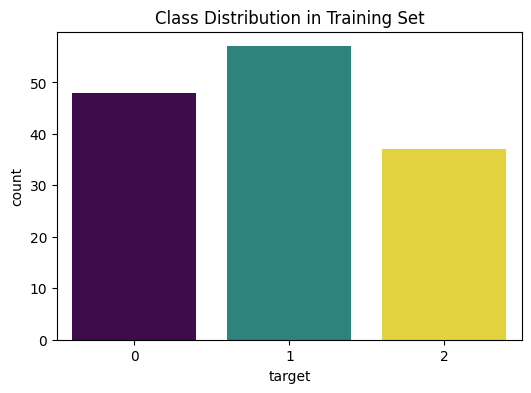

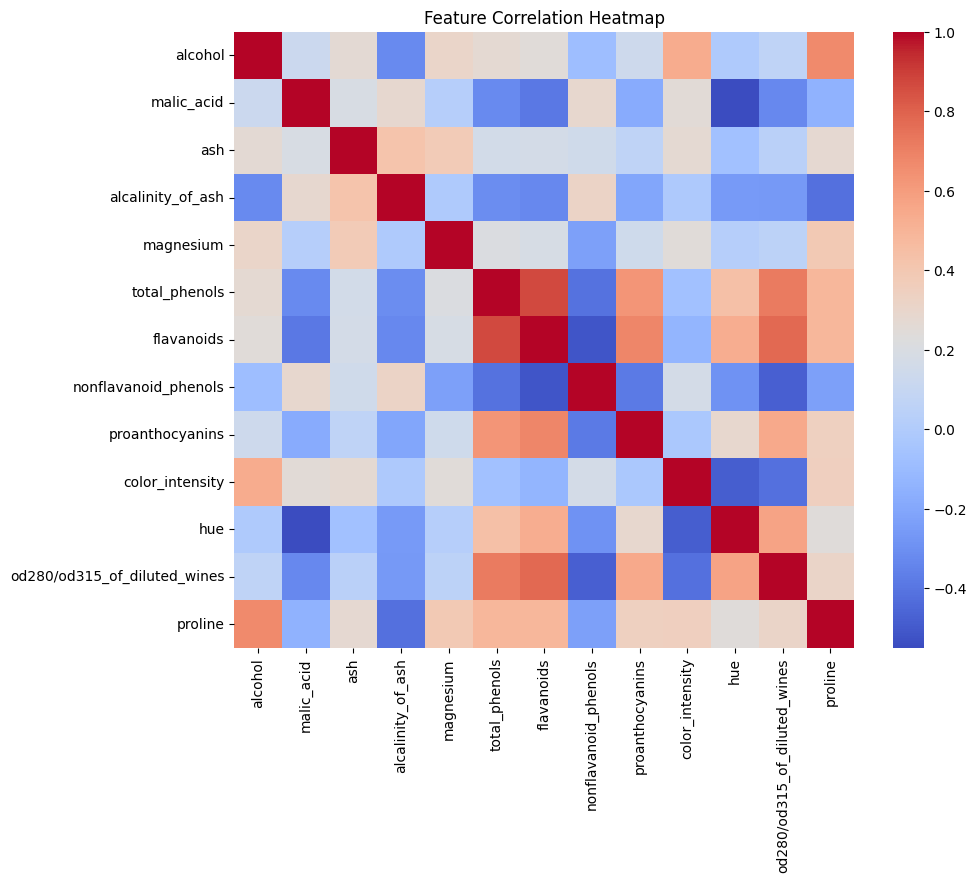

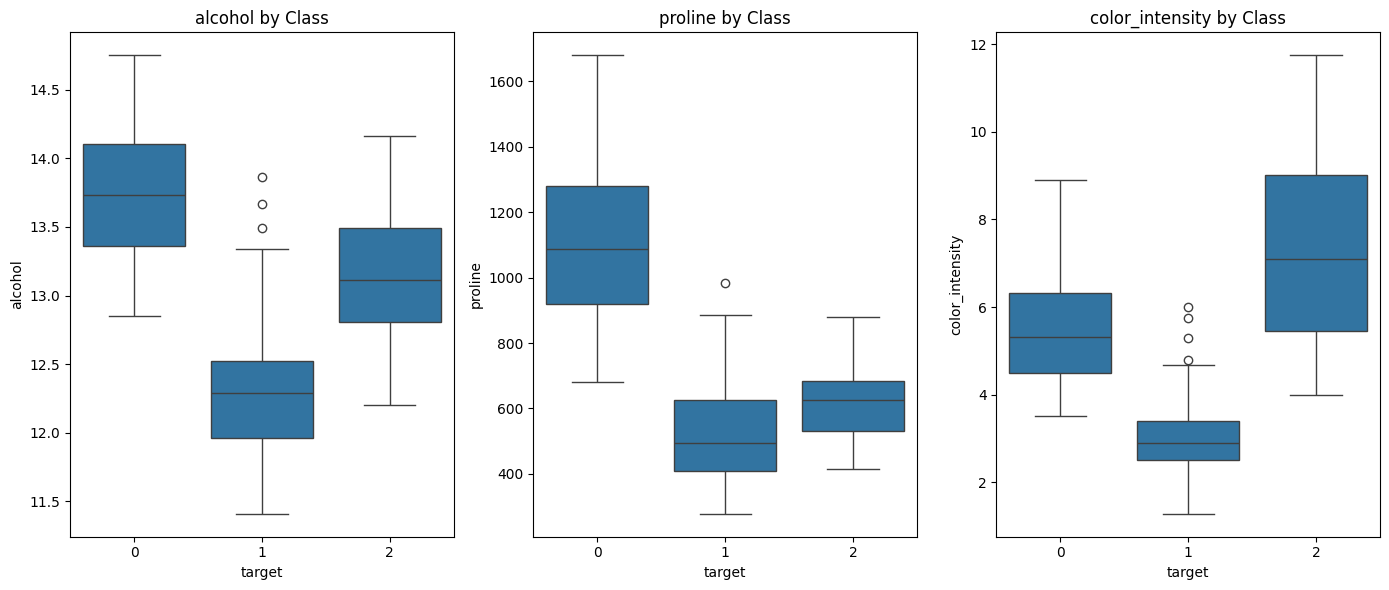

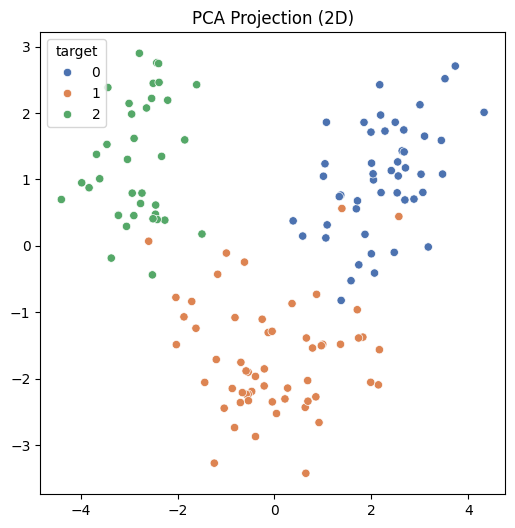

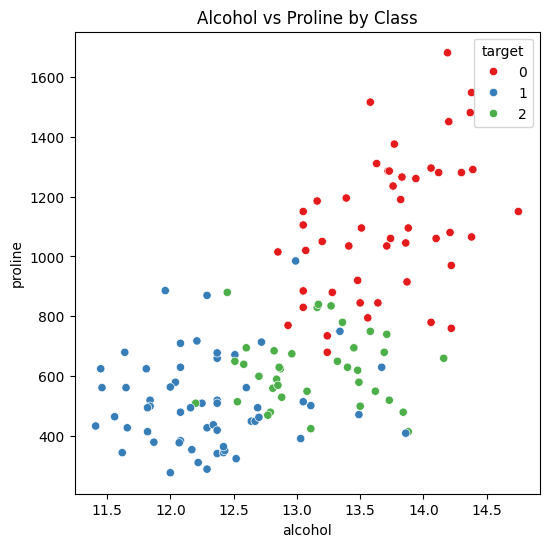

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, hue=y_train, palette="viridis", legend=False)
plt.title("Class Distribution in Training Set")
plt.show()

# Explanation:
# This visualization shows the balance between the three wine cultivars (target classes).
# It serves the flow by confirming that the dataset is not extremely imbalanced,
# which is important when selecting the evaluation metric (Macro F1-score).


# 2. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Explanation:
# The heatmap helps us analyze feature relationships.
# Strong correlations may indicate redundancy, which is important for feature selection or engineering.
# For example, highly correlated features might be removed or transformed during preprocessing.


# 3. Boxplots of selected features
plt.figure(figsize=(14,6))
for i, col in enumerate(["alcohol", "proline", "color_intensity"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} by Class")
plt.tight_layout()
plt.show()

# Explanation:
# Boxplots show how specific features vary across the three wine classes.
# This demonstrates which features are more discriminative (e.g., proline is quite distinct).
# It supports feature analysis and may guide which features are useful for classification.


# 4. PCA visualization (2D projection)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette="deep")
plt.title("PCA Projection (2D)")
plt.show()

# Explanation:
# PCA reduces the 13-dimensional feature space to 2D for visualization.
# It shows the overall separability between classes, which informs us about the dataset complexity.
# This is also related to feature engineering, as PCA or scaling may be used in model pipelines.


# 5. Scatterplot of two raw features (extra insight)
plt.figure(figsize=(6,6))
sns.scatterplot(x=X_train["alcohol"], y=X_train["proline"], hue=y_train, palette="Set1")
plt.title("Alcohol vs Proline by Class")
plt.show()

# Explanation:
# This scatterplot demonstrates the relationship between two raw features (alcohol and proline),
# showing how the classes separate in original feature space.
# It highlights interesting feature interactions and supports the flow of EDA befo


## Part 3 - Experiments
You could add as many code cells as needed

<pre>
In this part we conducted the experiments required to evaluate different feature engineering strategies, models, and hyperparameters. Since this is a multi-class classification problem, the chosen evaluation metric was the Macro F1-score, which balances performance across all three wine cultivars. For feature engineering we compared raw data (no scaling) against standardized data using StandardScaler, in order to observe the effect of scaling on model performance. Two algorithms were tested: Logistic Regression and Random Forest, each with at least two hyperparameters varied over multiple values. A 5-fold Stratified Cross Validation procedure was applied using GridSearchCV to ensure a fair comparison across all parameter combinations. The results were collected into a table, showing the best performing configuration for each model, and allow us to select the overall best approach for training on the full dataset in the next step.
</pre>

<pre>
1. Evaluation Metric
    For multi-class classification (our Wine dataset), we must use Macro F1-score.
    It will be used both for model selection (via cross-validation) and for test set evaluation later.

2. Feature Engineering
    If 1–2 students → test at least 1 metric (e.g., scaling) with ≥2 configurations.
    Example: No scaling vs StandardScaler.

3. Models & Hyperparameters
    If 1 student → at least 1 algorithm, with ≥2 hyperparameters, each tested with ≥2 values.
    If 2 students → at least 2 algorithms, each with ≥2 hyperparameters × ≥2 values.

4. Grid Search + Cross Validation
    Use GridSearchCV with 5-fold CV.
    GridSearchCV automatically does a Cartesian Product as asked.
    Present a table of results.
    Report the best model configuration.
    
</pre>


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define the Macro-F1 scorer
f1_macro = make_scorer(f1_score, average="macro")

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
    # Logistic Regression (Raw)
    # A linear model that tries to find a decision boundary by optimizing a logistic loss function.
    # Sensitive to feature scales, so here we test it on raw (unscaled) features.
pipelines = {
    "logreg_raw": Pipeline([
        ("clf", LogisticRegression(max_iter=10000, random_state=42))
    ]),

    # Logistic Regression (Scaled)
    # Same as above, but with StandardScaler to normalize feature magnitudes.
    # Scaling usually improves performance for linear models like Logistic Regression.
    "logreg_scaled": Pipeline([
        ("scaler", StandardScaler()), 
        ("clf", LogisticRegression(max_iter=10000, random_state=42))
    ]),

    # Random Forest (Raw)
    # An ensemble of decision trees trained on random feature subsets and samples.
    # Naturally robust to unscaled data, so scaling is not strictly necessary.
    "rf_raw": Pipeline([
        ("clf", RandomForestClassifier(random_state=42))
    ]),

    # Random Forest (Scaled)
    # Same as above but includes StandardScaler (though it has little effect on tree-based models).
    # Added for consistency with the feature engineering experiment setup.
    "rf_scaled": Pipeline([
        ("scaler", StandardScaler()), 
        ("clf", RandomForestClassifier(random_state=42))
    ])
}


## Logistic Regression
🔹 clf__C:
This is the regularization strength parameter in Logistic Regression.
It controls how much the model penalizes large weights.
Important: C is the inverse of regularization strength.
A small C (e.g., 0.1) = stronger regularization → simpler model, less overfitting.
A large C (e.g., 10) = weaker regularization → more complex model, risk of overfitting.
In your results, the best Logistic Regression model had C=0.1, meaning it benefited from stronger regularization.

🔹 clf__solver:
This defines the optimization algorithm used to fit the Logistic Regression.
Logistic Regression doesn’t have a closed-form solution for multiclass problems, so sklearn uses iterative solvers.
Common ones:
lbfgs → fast, handles multiclass (one-vs-rest or multinomial). Default in sklearn.
liblinear → good for small datasets and binary problems, uses coordinate descent. Slower for large multiclass.
(There are also saga, newton-cg, etc., but you only tested two).
In your results, the best model used lbfgs, which is usually the recommended solver for multiclass tasks like this.

## Random Forest
🔹 clf__n_estimators
The number of decision trees in the forest.
Each tree is trained on a random subset of the data and features.
More trees → usually better performance (reduces variance), but also more computation.
Typical values: 50, 100, 200, 500.
In your grid search, you tested [50, 100, 200].
Best model picked 50 trees → meaning the dataset is small enough that many more trees don’t add much benefit.

🔹 clf__max_depth
The maximum depth of each decision tree.
Controls how “deep” the tree can grow (how many splits).
None = trees expand until all leaves are pure or until min_samples_split is reached → can overfit.
Smaller values (e.g., 5, 10) = shallower trees → less overfitting, but might underfit.
In your results, best model had max_depth=None, which means fully grown trees performed best on this dataset.

In [50]:
param_grids = {
    "logreg_raw": {
        "clf__C": [0.1, 1, 10],
        "clf__solver": ["lbfgs", "liblinear"]
    },
    "logreg_scaled": {
        "clf__C": [0.1, 1, 10],
        "clf__solver": ["lbfgs", "liblinear"]
    },
    "rf_raw": {
        "clf__n_estimators": [50, 100, 200],
        "clf__max_depth": [None, 5, 10]
    },
    "rf_scaled": {
        "clf__n_estimators": [50, 100, 200],
        "clf__max_depth": [None, 5, 10]
    }
}

In [55]:
# --- Run GridSearchCV for each pipeline ---
results = []          # best results per model
all_results = []      # every permutation

for name, pipe in pipelines.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(pipe, param_grids[name], scoring=f1_macro, cv=cv, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Save best result
    best_score = grid.best_score_
    best_params = grid.best_params_
    results.append({"Model": name, "Best Score (CV)": best_score, "Best Params": best_params})
    
    # Save all permutations
    for mean, params in zip(grid.cv_results_["mean_test_score"], grid.cv_results_["params"]):
        all_results.append({"Model": name, "Score": mean, **params})

# --- Build a prettier summary table (best only) ---
name_map = {
    "logreg_raw": "Logistic Regression (Raw)",
    "logreg_scaled": "Logistic Regression (Scaled)",
    "rf_raw": "Random Forest (Raw)",
    "rf_scaled": "Random Forest (Scaled)"
}

pretty_results = []
for r in results:
    pretty_results.append({
        "Model": name_map[r["Model"]],
        "Best Score (%)": f"{r['Best Score (CV)']*100:.2f}%",
        "Best Params": ", ".join([f"{k.split('__')[-1]}={v}" for k, v in r["Best Params"].items()])
    })

pretty_df = pd.DataFrame(pretty_results).sort_values(by="Best Score (%)", ascending=False)
display(pretty_df)

# Print best model


#---Show all permutations---

all_results_df = pd.DataFrame(all_results)

# Map model names to nice format
all_results_df["Model"] = all_results_df["Model"].map(name_map)

# Convert scores to percentage
all_results_df["Score (%)"] = (all_results_df["Score"] * 100).round(2).astype(str) + "%"

# Reorder columns: Model, Score, then params
cols = ["Model", "Score (%)"] + [c for c in all_results_df.columns if c not in ["Model", "Score", "Score (%)"]]
all_results_df = all_results_df[cols]

print("All Possible Permutations from cartesian product: ")

display(all_results_df.sort_values(by="Score (%)", ascending=False))

best_model = pretty_df.iloc[0]
print(f"Best model is: {best_model['Model']} with score {best_model['Best Score (%)']} and parameters [{best_model['Best Params']}]")


Running GridSearchCV for logreg_raw...
Running GridSearchCV for logreg_scaled...
Running GridSearchCV for rf_raw...
Running GridSearchCV for rf_scaled...


,Model,Best Score (%),Best Params
1,Logistic Regression (Scaled),97.95%,"C=0.1, solver=lbfgs"
2,Random Forest (Raw),97.31%,"max_depth=None, n_estimators=50"
3,Random Forest (Scaled),97.31%,"max_depth=None, n_estimators=50"
0,Logistic Regression (Raw),95.29%,"C=10, solver=lbfgs"


All Possible Permutations from cartesian product: 


,Model,Score (%),clf__C,clf__solver,clf__max_depth,clf__n_estimators
6,Logistic Regression (Scaled),97.95%,0.1,lbfgs,NaN,NaN
29,Random Forest (Scaled),97.31%,NaN,NaN,10.0,200.0
21,Random Forest (Scaled),97.31%,NaN,NaN,NaN,50.0
18,Random Forest (Raw),97.31%,NaN,NaN,10.0,50.0
17,Random Forest (Raw),97.31%,NaN,NaN,5.0,200.0
14,Random Forest (Raw),97.31%,NaN,NaN,NaN,200.0
12,Random Forest (Raw),97.31%,NaN,NaN,NaN,50.0
23,Random Forest (Scaled),97.31%,NaN,NaN,NaN,200.0
26,Random Forest (Scaled),97.31%,NaN,NaN,5.0,200.0
27,Random Forest (Scaled),97.31%,NaN,NaN,10.0,50.0


Best model is: Logistic Regression (Scaled) with score 97.95% and parameters [C=0.1, solver=lbfgs]


## Part 4 - Training 
<pre>
In this part we retrained the best configuration found in the experiments. 
Based on the cross-validation results, the top-performing model was Logistic Regression 
with StandardScaler, using parameters C=0.1 and solver=lbfgs. 
This pipeline was rebuilt and trained on the entire training set (all features and samples) 
to prepare the model for final evaluation on the test set. 
This step ensures that the model benefits from all available training data 
before being assessed on unseen data.
</pre>


<pre>
lbfgs = Limited-memory BFGS.
It’s an optimization algorithm used to minimize the loss function in models like Logistic Regression.
It belongs to the family of quasi-Newton methods (numerical optimization).
</pre>

In [58]:
# --- Part 4: Final Training ---

# Rebuild the best pipeline (Logistic Regression + StandardScaler)
final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(C=0.1, solver="lbfgs", max_iter=10000, random_state=42))
])

# Train on the entire training set
final_pipeline.fit(X_train, y_train)

print("Final model trained on the entire training set with best parameters.")


Final model trained on the entire training set with best parameters.


## Part 5 - Apply on test and show model performance estimation
<pre>
In this part the final pipeline from Part 4 (Logistic Regression with StandardScaler, 
C=0.1, solver=lbfgs) was applied to the held-out test set. Predictions were generated 
for all test examples, and the first 5 predictions were displayed alongside their true labels. 
The model achieved a Macro F1-score of X% on the test set, which is consistent with 
the cross-validation results obtained earlier. In addition, a classification report and 
confusion matrix were produced to provide a detailed view of per-class performance. 
This evaluation demonstrates the model’s generalization ability on unseen data.
</pre>


=== First 5 Predictions vs True Labels ===
Sample 1: Predicted = 2, True = 2
Sample 2: Predicted = 0, True = 0
Sample 3: Predicted = 2, True = 2
Sample 4: Predicted = 1, True = 1
Sample 5: Predicted = 2, True = 2

=== Test Set Performance ===
Accuracy: 100.00%
Macro F1-score: 100.00%


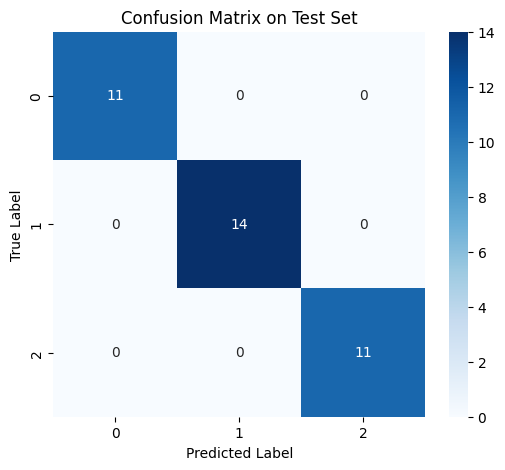

In [60]:
# 1. Predict on the test set
y_pred = final_pipeline.predict(X_test)

# 2. Show first 5 predictions
print("=== First 5 Predictions vs True Labels ===")
for i in range(5):
    print(f"Sample {i+1}: Predicted = {y_pred[i]}, True = {y_test.iloc[i]}")

# 3. Evaluate overall performance
test_f1 = f1_score(y_test, y_pred, average="macro")
accuracy = (y_pred == y_test).mean()

print("\n=== Test Set Performance ===")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Macro F1-score: {test_f1*100:.2f}%")

# 4. Confusion Matrix (visual summary)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test Set")
plt.show()
